In [149]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

printmd("# <center> Lab 1 <center>")

# <center> Lab 1 <center>

In [150]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()

df_init = pd.DataFrame(data.data, columns = data.feature_names)

df = df_init.copy()

# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica

# data.target, data.target_names

species = []

for i in data.target:
    if i==0:
        species.append("Iris-setosa")
    elif i==1:
        species.append('Iris-versicolor')
    elif i==2:
        species.append('Iris-virginica')

df['Species'] = species


In [151]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [152]:
df.shape

(150, 5)

In [153]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [154]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [155]:
printmd("# <center> Lab 2 <center>")

# <center> Lab 2 <center>

#### Number of Species:

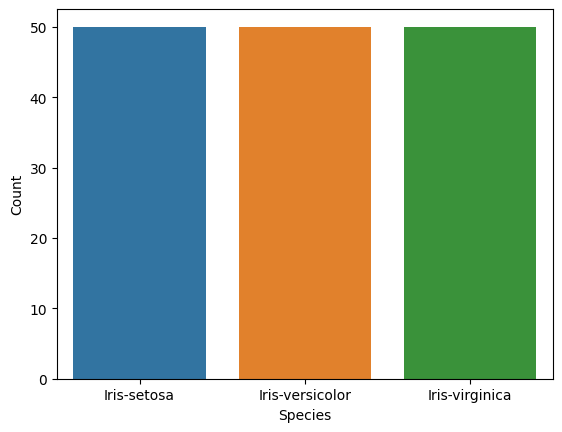

In [156]:
import seaborn
import matplotlib.pyplot as plot

viz = df["Species"].value_counts()
vizDF = pd.DataFrame({'Species': viz.index, 'Count': viz.values})

printmd("#### Number of Species:")
seaborn.barplot(x="Species", y="Count", data=vizDF)
plot.show()

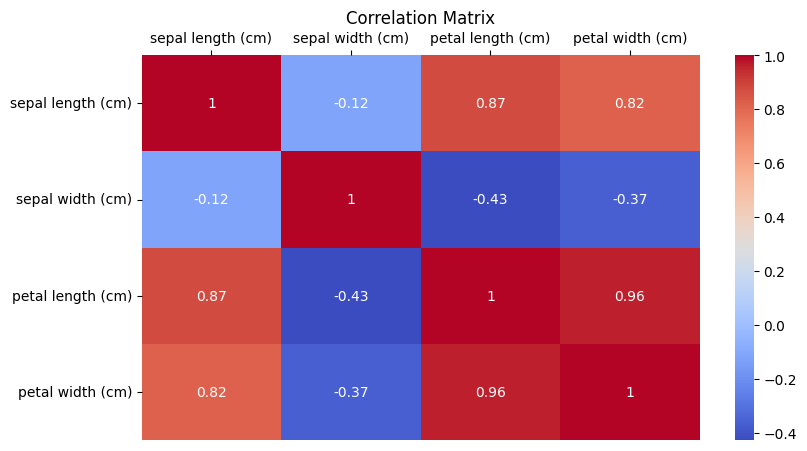

In [157]:
correlation_matrix = df_init.corr()

plot.figure(figsize=(9, 5))
heatmap = seaborn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
heatmap.set(xlabel="", ylabel="")
heatmap.xaxis.tick_top()
plot.title("Correlation Matrix")
plot.show()

#### Outlier Mining:

Sepal Length (Cm):



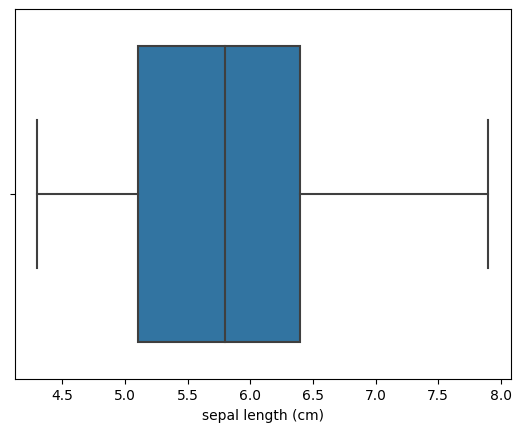


Sepal Width (Cm):



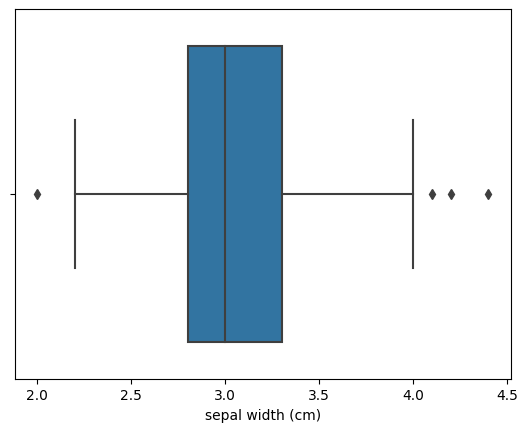


Petal Length (Cm):



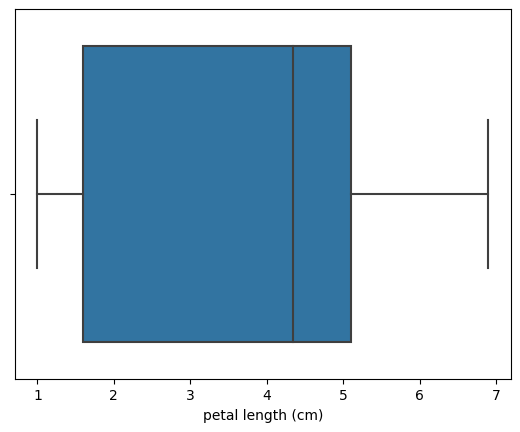


Petal Width (Cm):



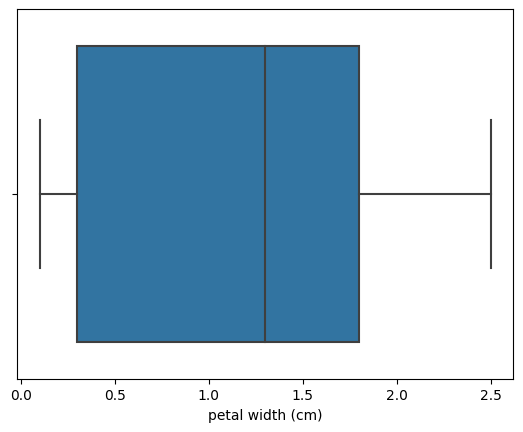

In [158]:
printmd("#### Outlier Mining:")

for i in df.columns[0:-1]:
    print(i.title() + ":\n")
    seaborn.boxplot(x=i, data=df)
    plot.show()
    print()

#### Scatter Plot Visualization:

Text(0, 0.5, 'Sepal Length')

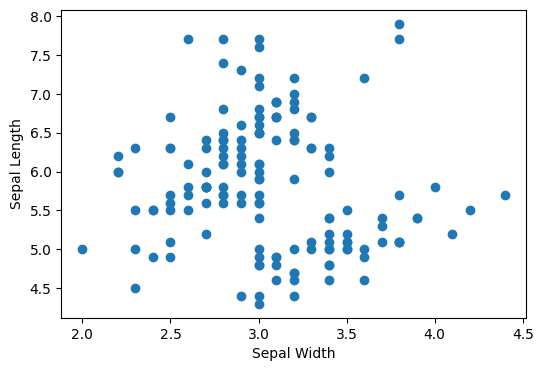

In [159]:
printmd("#### Scatter Plot Visualization:")

fig, scat = plot.subplots(figsize = (6,4))
scat.scatter(df['sepal width (cm)'], df['sepal length (cm)'])

scat.set_xlabel("Sepal Width")
scat.set_ylabel("Sepal Length")

Before removing outliers:


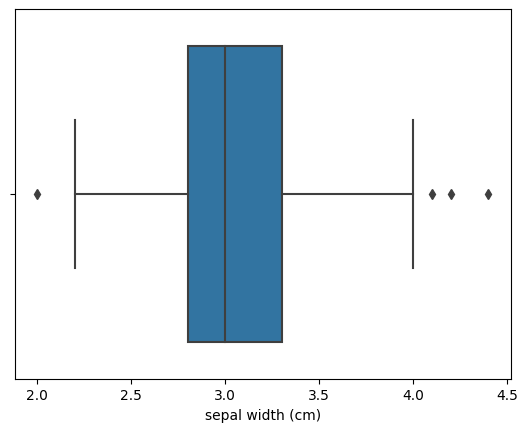

Maximum:  (array([15, 32, 33], dtype=int64),)
Minimum:  (array([60], dtype=int64),)

After removing outliers:


C:\Users\victo\AppData\Local\Temp\ipykernel_1988\1034762093.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['sepal width (cm)'], 25, interpolation = 'midpoint')
C:\Users\victo\AppData\Local\Temp\ipykernel_1988\1034762093.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['sepal width (cm)'], 75, interpolation = 'midpoint')


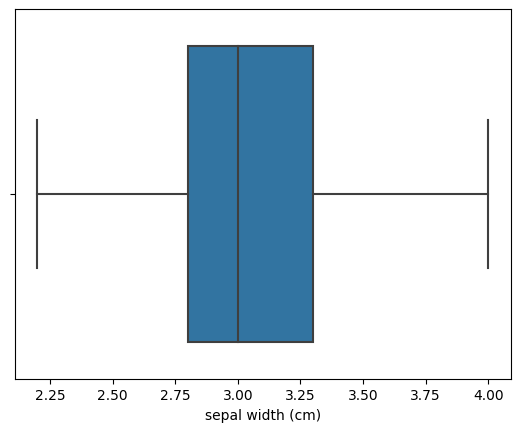

Old Shape:  (150, 5) 
New Shape:  (146, 5)


In [160]:
oldShape = df.shape
print("Before removing outliers:")
seaborn.boxplot(x='sepal width (cm)', data=df)
plot.show()
 

Q1 = np.percentile(df['sepal width (cm)'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['sepal width (cm)'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
  
maximum = np.where(df['sepal width (cm)'] >= (Q3+1.5*IQR))
minimum = np.where(df['sepal width (cm)'] <= (Q1-1.5*IQR))

print("Maximum: ", maximum)
print("Minimum: ", minimum)
 
df.drop(maximum[0], inplace = True)
df.drop(minimum[0], inplace = True)

print("\nAfter removing outliers:")
seaborn.boxplot(x='sepal width (cm)', data=df)
plot.show()

print("Old Shape: ", oldShape, "\nNew Shape: ", df.shape)

#### Number of Species After Removing Outliers:

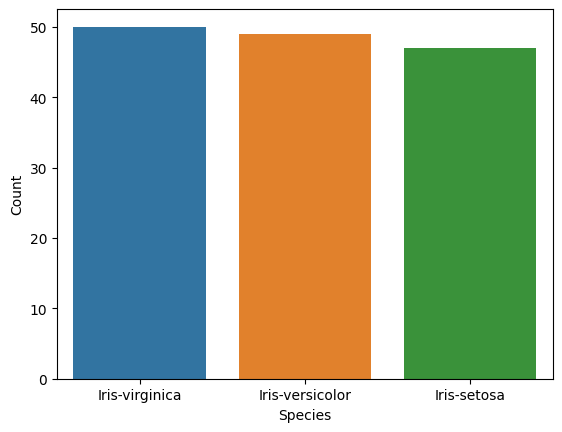

In [161]:
vizO = df["Species"].value_counts()
vizODF = pd.DataFrame({'Species': vizO.index, 'Count': vizO.values})

printmd("#### Number of Species After Removing Outliers:")
seaborn.barplot(x="Species", y="Count", data=vizODF)
plot.show()

#### Variable Relationships:

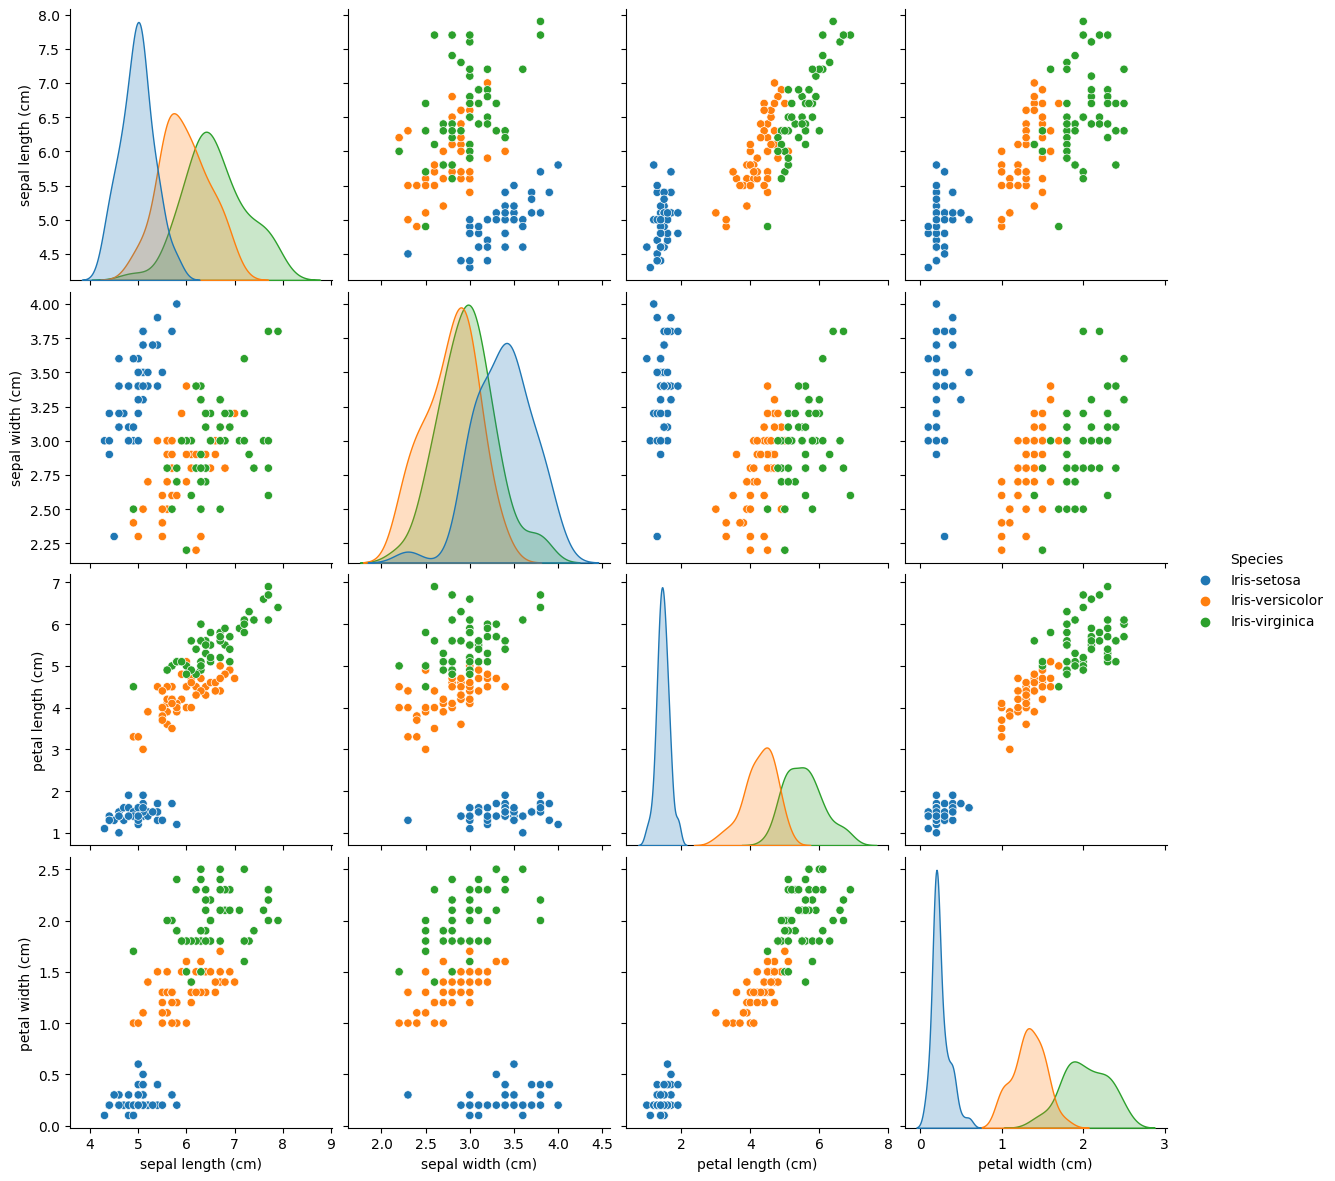

In [162]:
printmd("#### Variable Relationships:")

seaborn.pairplot(df,hue='Species', height=3)

In [163]:
printmd("# <center> Lab 3 <center>")

# <center> Lab 3 <center>

In [164]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Species")
Y = df["Species"]

feature_names = X.columns

labels = Y.unique()

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 100)

In [165]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [166]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_test)
printmd("##### Model Accuracy: " + str(accuracy_score(y_test, predictions)*100))

##### Model Accuracy: 97.2972972972973

### Decision Tree Visualiziation: 

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 109\nvalue = [34, 38, 37]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.5\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

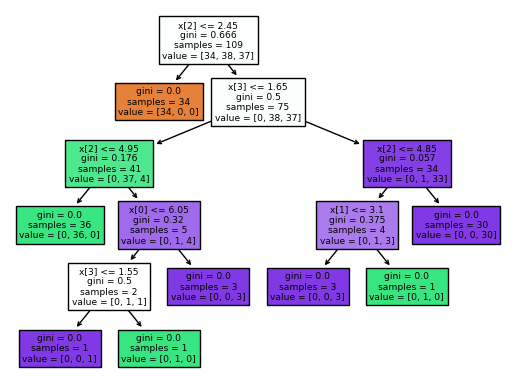

In [167]:
from sklearn import tree 

printmd("### Decision Tree Visualiziation: ")
tree.plot_tree(clf, filled=True)

In [168]:
printmd("# <center> Lab 4 <center>")

# <center> Lab 4 <center>

In [169]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [170]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_test, predictions)
print("The accuracy score:",score)

The accuracy score: 0.972972972972973


In [171]:
cm = confusion_matrix(y_test, predictions,labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])

print("The confusion matrix is:\n",cm)

The confusion matrix is:
 [[13  0  0]
 [ 0 10  1]
 [ 0  0 13]]


In [172]:
TP=13 #cell (1,1)
FP=0 #sum of cell (2,1), (3,1)
TN=24
FN=0

In [173]:
TPR=TP/(TP+FN)
print("True Positve rate:",TPR)

True Positve rate: 1.0


In [174]:
FPR=FP/(FP+TN)
print("The False Postive rate:",FPR)

The False Postive rate: 0.0


In [175]:
presi=TP/(TP+FP)
print("The precision:",presi)

The precision: 1.0


In [176]:
recall=TP/(TP+FN)
print("The recall:",recall)


The recall: 1.0


In [177]:
F1= 2*presi*recall/(presi+recall)
print("The F1:",F1)

The F1: 1.0


In [178]:
y_test.to_numpy()

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [179]:
# from sklearn.metrics import RocCurveDisplay
# from sklearn.preprocessing import LabelBinarizer
# import matplotlib.pyplot as plt

# label_binarizer = LabelBinarizer().fit(y_train)
# binarizedPredictions = label_binarizer.transform(y=predictions)
# binarizedY_test = label_binarizer.transform(y=y_test)
# class_of_interest = "Iris-setosa"   

# RocCurveDisplay.from_predictions(
#     y_true=binarizedY_test[:, 0],
#     y_pred=binarizedPredictions[:, 0],
#     name=f"{class_of_interest} vs the rest",
#     color="darkorange",
#     plot_chance_level=True,
# )
# plt.axis("square")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC curve:\nSetosa vs (Versicolor and Virginica)")
# plt.legend()
# plt.show()

from sklearn.metrics import roc_auc_score
roc_auc_score(y_true=y_test, y_score=clf.predict_proba(X_test), multi_class="ovr")

0.9779040404040403

In [180]:
printmd("# <center> Lab 5 <center>")

# <center> Lab 5 <center>

In [181]:
from sklearn.naive_bayes import MultinomialNB
bayesClf = MultinomialNB()
bayesClf.fit(X_train, y_train)

lab_5_results = [] # score, TP, FP, TN, FN


In [182]:
bayesPredictions = bayesClf.predict(X_test)
bayesAcc = accuracy_score(y_test, bayesPredictions)
print("The accuracy:", bayesAcc)

The accuracy: 0.972972972972973


In [183]:
confusion_matrix(y_test, bayesPredictions,labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 12]], dtype=int64)

In [184]:
roc = roc_auc_score(y_true=y_test, y_score=bayesClf.predict_proba(X_test), multi_class="ovr")
roc

0.993006993006993

In [185]:
TP=13
FP=0
TN=24
FN=0

TPR=TP/(TP+FN)
print("True Positve rate:",TPR)

FPR=FP/(FP+TN)
print("The False Postive rate:",FPR)

presi=TP/(TP+FP)
print("The precision:",presi)

recall=TP/(TP+FN)
print("The recall/sensitivity:",recall)

specif=TN/(TN+FP)
print("The specificity:",specif)

F1= 2*presi*recall/(presi+recall)
print("The F1:",F1)

lab_5_results.append([bayesAcc, TP, FP, TN, FN, recall, specif, presi, recall, roc])

True Positve rate: 1.0
The False Postive rate: 0.0
The precision: 1.0
The recall/sensitivity: 1.0
The specificity: 1.0
The F1: 1.0


In [186]:
from sklearn.naive_bayes import GaussianNB
gaussianClf = GaussianNB()
gaussianClf.fit(X_train, y_train)


GaussianNB()

In [187]:
gaussianPredictions = gaussianClf.predict(X_test)
gaussianAcc = accuracy_score(y_test, gaussianPredictions)
print("The accuracy:", gaussianAcc)

The accuracy: 0.972972972972973


In [188]:
confusion_matrix(y_test, gaussianPredictions,labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])

array([[13,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]], dtype=int64)

In [189]:
roc = roc_auc_score(y_true=y_test, y_score=gaussianClf.predict_proba(X_test), multi_class="ovr")
roc

1.0

In [190]:
TP=13
FP=0
TN=24
FN=0

TPR=TP/(TP+FN)
print("True Positve rate:",TPR)

FPR=FP/(FP+TN)
print("The False Postive rate:",FPR)

presi=TP/(TP+FP)
print("The precision:",presi)

recall=TP/(TP+FN)
print("The recall/sensitivity:",recall)

specif=TN/(TN+FP)
print("The specificity:",specif)

F1= 2*presi*recall/(presi+recall)
print("The F1:",F1)

lab_5_results.append([gaussianAcc, TP, FP, TN, FN, recall, specif, presi, recall, roc])

True Positve rate: 1.0
The False Postive rate: 0.0
The precision: 1.0
The recall/sensitivity: 1.0
The specificity: 1.0
The F1: 1.0


In [191]:
from sklearn.naive_bayes import ComplementNB
complementClf = ComplementNB()
complementClf.fit(X_train, y_train)

ComplementNB()

In [192]:
complementPredictions = complementClf.predict(X_test)
complementAcc = accuracy_score(y_test, complementPredictions)
print("The accuracy:", complementAcc)

The accuracy: 0.7027027027027027


In [193]:
confusion_matrix(y_test, complementPredictions,labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])

array([[13,  0,  0],
       [ 1,  0, 10],
       [ 0,  0, 13]], dtype=int64)

In [194]:
roc = roc_auc_score(y_true=y_test, y_score=complementClf.predict_proba(X_test), multi_class="ovr")
roc

0.9871794871794872

In [195]:
TP=13
FP=1
TN=23
FN=0

TPR=TP/(TP+FN)
print("True Positve rate:",TPR)

FPR=FP/(FP+TN)
print("The False Postive rate:",FPR)

presi=TP/(TP+FP)
print("The precision:",presi)

recall=TP/(TP+FN)
print("The recall/sensitivity:",recall)

specif=TN/(TN+FP)
print("The specificity:",specif)

F1= 2*presi*recall/(presi+recall)
print("The F1:",F1)

lab_5_results.append([complementAcc, TP, FP, TN, FN, recall, specif, presi, recall, roc])

True Positve rate: 1.0
The False Postive rate: 0.041666666666666664
The precision: 0.9285714285714286
The recall/sensitivity: 1.0
The specificity: 0.9583333333333334
The F1: 0.962962962962963


In [196]:
from sklearn.naive_bayes import BernoulliNB
bernoulliClf = BernoulliNB()
bernoulliClf.fit(X_train, y_train)

BernoulliNB()

In [197]:
bernoulliPredictions = bernoulliClf.predict(X_test)
bernoulliAcc = accuracy_score(y_test, bernoulliPredictions)
print("The accuracy:", bernoulliAcc)

The accuracy: 0.2972972972972973


In [198]:
confusion_matrix(y_test, bernoulliPredictions,labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])

array([[ 0, 13,  0],
       [ 0, 11,  0],
       [ 0, 13,  0]], dtype=int64)

In [199]:
roc = roc_auc_score(y_true=y_test, y_score=bernoulliClf.predict_proba(X_test), multi_class="ovr")
roc

0.5

In [200]:
TP=0
FP=0
TN=24
FN=13

TPR=TP/(TP+FN)
print("True Positve rate:",TPR)

FPR=FP/(FP+TN)
print("The False Postive rate:",FPR)

# presi=TP/(TP+FP)
print("The precision: N.A.")

recall=TP/(TP+FN)
print("The recall/sensitivity:",recall)

specif=TN/(TN+FP)
print("The specificity:",specif)

F1= 2*presi*recall/(presi+recall)
print("The F1:",F1)

lab_5_results.append([bernoulliAcc, TP, FP, TN, FN, recall, specif, presi, recall, roc])

True Positve rate: 0.0
The False Postive rate: 0.0
The precision: N.A.
The recall/sensitivity: 0.0
The specificity: 1.0
The F1: 0.0


In [201]:
from sklearn.naive_bayes import CategoricalNB
categoricalClf = CategoricalNB()
categoricalClf.fit(X_train, y_train)

CategoricalNB()

In [202]:
categoricalPredictions = categoricalClf.predict(X_test)
categoricalAcc = accuracy_score(y_test, categoricalPredictions)
print("The accuracy:", categoricalAcc)

The accuracy: 0.9459459459459459


In [203]:
confusion_matrix(y_test, categoricalPredictions,labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])

array([[13,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 12]], dtype=int64)

In [204]:
roc = roc_auc_score(y_true=y_test, y_score=categoricalClf.predict_proba(X_test), multi_class="ovr")
roc

0.991064491064491

In [205]:
TP=13
FP=0
TN=24
FN=0

TPR=TP/(TP+FN)
print("True Positve rate:",TPR)

FPR=FP/(FP+TN)
print("The False Postive rate:",FPR)

presi=TP/(TP+FP)
print("The precision:",presi)

recall=TP/(TP+FN)
print("The recall/sensitivity:",recall)

specif=TN/(TN+FP)
print("The specificity:",specif)

F1= 2*presi*recall/(presi+recall)
print("The F1:",F1)

lab_5_results.append([categoricalAcc, TP, FP, TN, FN, recall, specif, presi, recall, roc])

True Positve rate: 1.0
The False Postive rate: 0.0
The precision: 1.0
The recall/sensitivity: 1.0
The specificity: 1.0
The F1: 1.0


In [206]:
x_axis = ["Multinomial", "Gaussian", "Complement", "Bernoulli", "Categorical"]
y_axis = ["Accuracy", "TP", "FP", "TN", "FN", "Sensitivity", "Specificity", "Precision", "Recall", "AUC ROC"] 
pd.DataFrame(lab_5_results, x_axis, y_axis)

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,AUC ROC
Multinomial,0.972973,13,0,24,0,1.0,1.000000,1.000000,1.0,0.993007
Gaussian,0.972973,13,0,24,0,1.0,1.000000,1.000000,1.0,1.000000
Complement,0.702703,13,1,23,0,1.0,0.958333,0.928571,1.0,0.987179
Bernoulli,0.297297,0,0,24,13,0.0,1.000000,0.928571,0.0,0.500000
Categorical,0.945946,13,0,24,0,1.0,1.000000,1.000000,1.0,0.991064
